#**Q2(a).**

In [109]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from pylab import *

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

In [110]:
mnist = fetch_openml("mnist_784")

In [111]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.40, random_state=0)
lda = LDA(n_components=9)
X_train_r2 = lda.fit(X_train, y_train).transform(X_train)

In [112]:
X_train_r2
#lda.explained_variance_ratio_

array([[-0.83802314,  0.79363716, -2.24596587, ...,  1.05234074,
        -1.17820236, -0.64343911],
       [-1.05283545, -0.32333017, -0.11502412, ..., -1.89345235,
         3.73725555, -1.74719174],
       [-0.70942438,  1.34137099, -2.73821727, ...,  1.96260983,
        -0.47087317,  0.42831177],
       ...,
       [ 2.40075933, -1.09908217, -1.34553271, ..., -0.21423737,
         0.6525376 ,  0.23647245],
       [ 0.24472386,  3.90344305, -0.36239286, ...,  0.08714942,
        -0.03893482, -0.06949245],
       [ 0.39554512,  2.80659566,  0.18482713, ..., -0.9726532 ,
         0.50774717,  0.92681156]])

In [113]:
y_pred = lda.predict(X_test)
print("Accuracy before Attack: ",accuracy_score(y_test, y_pred))

Accuracy before Attack:  0.8621428571428571


In [114]:
print(
    f"Classification report for classifier {lda}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)
w0 = lda.intercept_
w = lda.coef_
print(f"Bias: \n{w0}")
print(f"\n\nWeights: \n{w}")

Classification report for classifier LinearDiscriminantAnalysis(n_components=9):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2812
           1       0.87      0.96      0.91      3179
           2       0.90      0.80      0.85      2787
           3       0.86      0.84      0.85      2815
           4       0.83      0.90      0.86      2678
           5       0.82      0.81      0.82      2523
           6       0.91      0.91      0.91      2740
           7       0.91      0.82      0.86      2927
           8       0.80      0.79      0.80      2716
           9       0.77      0.85      0.81      2823

    accuracy                           0.86     28000
   macro avg       0.86      0.86      0.86     28000
weighted avg       0.86      0.86      0.86     28000


Bias: 
[-14.02231332  -9.9180227  -11.50449567 -10.00387882  -7.2549487
  -5.93495946 -15.42759498 -11.27285202 -10.88903113  -8.76351898]


Weights: 
[[-3.500

Confusion matrix:
[[2631    5   11   12   16   53   35    2   45    2]
 [   0 3065   20    6    5   15    4    4   58    2]
 [  28   98 2223  100   62   15  101   19  124   17]
 [   6   45   83 2364   11  103   13   51   74   65]
 [   4   24   19    1 2405   18   14    4   28  161]
 [  24   30   16  118   34 2039   50   15  123   74]
 [  26   31   43    1   50   71 2480    0   37    1]
 [  13   70   26   23   80   11    0 2392   17  295]
 [  14  139   20   95   47  136   15    7 2152   91]
 [  16   16    7   39  175   14    0  132   35 2389]]


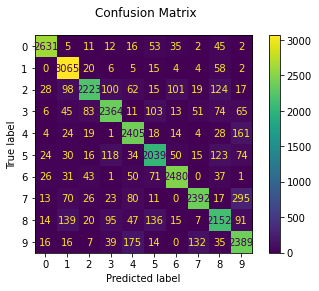

In [115]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#**Q2(b).**

ValueError: ignored